In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
from tensorflow.keras.utils import to_categorical


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [9]:
import tensorflow as tf

In [10]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv")


In [11]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [13]:
df.columns

Index(['Review', 'Rating'], dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

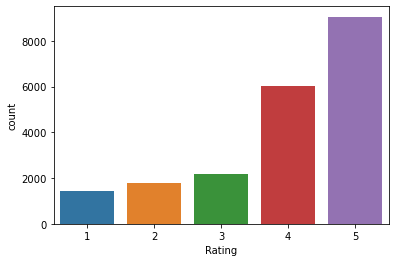

In [14]:
sns.countplot(df['Rating'])

In [15]:
df.sample(len(df))

,Review,Rating
5424,"great hotel better staff appointed hotel, clea...",5
17613,not stay stayed 5 nights floor 21 rooms 17 18 ...,2
16056,comfortable stay nice place stay wife daughter...,4
9094,confortable far city centre stayed overnight c...,4
1613,enjoyed stay college visit bay area stayed cha...,5
...,...,...
15259,amazing service traveled singapore stayed diff...,5
13301,described wonderful stayed great hotel nights ...,4
15526,"wow absolutely amazing impressed, tell looking...",5
3790,"great time room big clean comfortable, big por...",4


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'],df['Rating'], test_size=0.33, random_state=42)

In [17]:
X_train.shape

(13728,)

In [18]:
X_test.shape

(6763,)

In [19]:
tokenizer = Tokenizer(10_000 , oov_token='<OOV>')


In [20]:
tokenizer

In [21]:
tokenizer.fit_on_texts(X_train)


In [22]:
train_sequences = tokenizer.texts_to_sequences(X_train) 


In [23]:
train_sequences

[[13,
  184,
  5,
  15,
  216,
  36,
  140,
  554,
  311,
  2579,
  1,
  1017,
  433,
  1151,
  1843,
  7123,
  3,
  247,
  63,
  227,
  445,
  64,
  65,
  1191,
  1766,
  376,
  19,
  74,
  702],
 [69,
  37,
  2,
  293,
  230,
  667,
  32,
  545,
  404,
  2,
  2315,
  6848,
  230,
  4,
  8,
  66,
  2041,
  9,
  56,
  1,
  398,
  738,
  67,
  50,
  1486,
  765,
  15,
  254,
  102,
  217,
  788,
  140,
  261,
  1299,
  368,
  212,
  51,
  2,
  139,
  293],
 [1,
  2529,
  16,
  15,
  109,
  866,
  1345,
  177,
  1552,
  48,
  1192,
  4,
  687,
  48,
  1332,
  1569,
  4990,
  2162,
  1300,
  1276,
  1767,
  5385,
  5386,
  2791,
  29,
  19,
  334,
  97,
  531,
  4651,
  1,
  2580,
  1121,
  3849,
  920,
  488,
  3],
 [434,
  600,
  1159,
  141,
  2,
  365,
  49,
  1645,
  1600,
  188,
  935,
  6580,
  468,
  1,
  291,
  121,
  15,
  237,
  515,
  232,
  4,
  119,
  6085,
  138,
  1,
  3,
  205,
  37,
  2399,
  12,
  377,
  294,
  1029,
  53,
  4991,
  1,
  240,
  101,
  930,
  579,
  1410

In [24]:
test_sequences = tokenizer.texts_to_sequences(X_test) 

In [25]:
test_sequences

[[4,
  51,
  2,
  10,
  995,
  277,
  9,
  2,
  10,
  7,
  142,
  2,
  15,
  27,
  90,
  4065,
  1990,
  370,
  1944,
  35,
  10,
  4,
  234,
  505,
  53,
  473,
  1054,
  370,
  4,
  473,
  44,
  83,
  35,
  2063,
  8,
  500,
  997,
  129,
  19,
  176,
  1575,
  2505,
  19,
  4,
  51,
  2],
 [276,
  1553,
  16,
  2,
  1717,
  1245,
  44,
  58,
  201,
  947,
  29,
  2,
  39,
  15,
  8024,
  1,
  90,
  2106,
  1294,
  572,
  1363,
  3884,
  64,
  2061,
  5159,
  1,
  1964,
  1955,
  104,
  161,
  276,
  1221,
  224,
  376,
  252,
  160,
  50,
  2,
  141,
  31,
  534,
  36,
  4956,
  2106,
  5668,
  306,
  747,
  1550,
  2,
  166,
  22,
  183,
  533,
  3,
  519,
  323,
  144,
  76,
  151,
  3,
  7,
  171,
  47,
  181,
  1,
  74,
  860,
  274,
  98,
  1,
  528,
  903,
  2873,
  5459,
  548,
  2153,
  29,
  1179,
  2,
  1646,
  1,
  1997,
  1,
  2,
  5086,
  790,
  31,
  173,
  261,
  1299,
  168,
  1073,
  106,
  64,
  788,
  1179,
  147,
  1,
  1822,
  2,
  761,
  53,
  141,
  1004,
  1,

In [26]:
average_len = np.mean([len(seq) for seq in train_sequences])


In [27]:
average_len

107.83406177156178

In [28]:
max_len = 150

In [29]:
train_pad = pad_sequences(train_sequences ,maxlen= max_len )

In [30]:
train_pad

array([[   0,    0,    0, ...,   19,   74,  702],
       [   0,    0,    0, ...,    2,  139,  293],
       [   0,    0,    0, ...,  920,  488,    3],
       ...,
       [   0,    0,    0, ..., 8307,   43, 1328],
       [   0,    0,    0, ...,    5,   86,    9],
       [   0,    0,    0, ...,    1,    1,  129]])

In [31]:
train_pad.shape

(13728, 150)

In [32]:
test_pad =  pad_sequences(test_sequences ,maxlen= max_len )


In [33]:
test_pad.shape

(6763, 150)

In [34]:
train_label = to_categorical(y_train)

In [35]:
train_label

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [36]:
test_label =  to_categorical(y_test)


In [37]:
test_label

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [38]:
train_label.shape # only 5 values 

(13728, 6)

In [39]:
test_label.shape

(6763, 6)

In [40]:
train_label = train_label[: , 1:]

In [41]:
train_label.shape

(13728, 5)

In [42]:
test_label=test_label[:,1:]

In [43]:
test_label.shape

(6763, 5)

In [44]:
tf.keras.backend.clear_session ()

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000 , 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16 , return_sequences = True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256 , activation = 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(5 , activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         4224      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                        

In [45]:
model.compile(loss  = tf.keras.losses.categorical_crossentropy,optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'] )

In [46]:
history  = model.fit(train_pad , train_label , validation_split = 0.05 , epochs= 10)


Epoch 1/10
408/408 [==============================] - 49s 104ms/step - loss: 1.0965 - accuracy: 0.5194 - val_loss: 1.3938 - val_accuracy: 0.4862
Epoch 2/10
408/408 [==============================] - 41s 100ms/step - loss: 0.8192 - accuracy: 0.6399 - val_loss: 1.1339 - val_accuracy: 0.5473
Epoch 3/10
408/408 [==============================] - 39s 96ms/step - loss: 0.6520 - accuracy: 0.7213 - val_loss: 1.1243 - val_accuracy: 0.5531
Epoch 4/10
408/408 [==============================] - 34s 84ms/step - loss: 0.5186 - accuracy: 0.7835 - val_loss: 1.5137 - val_accuracy: 0.5822
Epoch 5/10
408/408 [==============================] - 36s 88ms/step - loss: 0.3772 - accuracy: 0.8511 - val_loss: 1.3735 - val_accuracy: 0.6143
Epoch 6/10
408/408 [==============================] - 37s 91ms/step - loss: 0.2733 - accuracy: 0.8954 - val_loss: 2.0615 - val_accuracy: 0.5648
Epoch 7/10
408/408 [==============================] - 40s 98ms/step - loss: 0.2191 - accuracy: 0.9160 - val_loss: 3.6331 - val_accurac

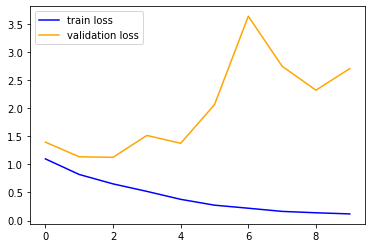

In [47]:
loss =  history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss , 'b' , label = 'train loss')
plt.plot(val_loss , 'orange' , label = 'validation loss')

plt.legend()
plt.show()

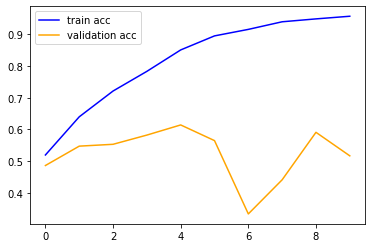

In [48]:
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc , 'b' , label = 'train acc')
plt.plot(val_acc , 'orange' , label = 'validation acc')

plt.legend()
plt.show()

In [49]:
model.evaluate(test_pad , test_label)


212/212 [==============================] - 4s 20ms/step - loss: 2.9664 - accuracy: 0.4751


[2.9664268493652344, 0.4750850200653076]